<a href="https://colab.research.google.com/github/PhanThyAn/Lab-2_MayHoc/blob/main/Lab_6_20130195_PhanThiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/Lab_6'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_6


In [42]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import metrics
from prettytable import PrettyTable
from numpy import set_printoptions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,ComplementNB
from prettytable import PrettyTable
from numpy import average
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 1 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 8 9 2 8 1 9 8 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 7 9 5 4 5 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

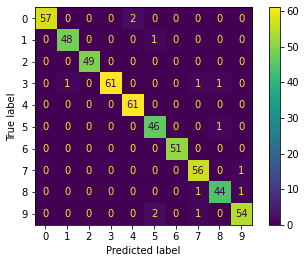

In [ ]:
# code
mnist = datasets.load_digits(as_frame=True)
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
Accuracy_RdForest = metrics.accuracy_score(y_test, y_pred)
Precision_RdForest = metrics.precision_score(y_test, y_pred, average='macro')
Recall_RdForest = metrics.recall_score(y_test, y_pred, average='macro')
F1_RdForest = metrics.f1_score(y_test, y_pred,average='macro')
print('Accuracy_RdForest', Accuracy_RdForest)
print('Precision_RdForest', Precision_RdForest)
print('Recall_RdForest', Recall_RdForest)
print('F1_RdForest', F1_RdForest)
# print(metrics.classification_report(y_test, y_pred)
RF =['RandomForest', round(Accuracy_RdForest, 2), round(Precision_RdForest, 2), round(Recall_RdForest, 2), round(F1_RdForest, 2)]

Accuracy_NaiveBayes:  0.8314814814814815
Precision_NaiveBayes: 0.8564459331774179
Recall_NaiveBayes:  0.8297997449295709
F1_NaiveBayes: 0.8292048465599453


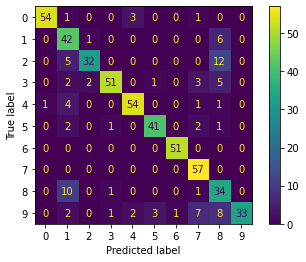

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Accuracy_NaiveBayes=  metrics.accuracy_score(y_test, y_pred)
Precision_NaiveBayes=  metrics.precision_score(y_test, y_pred, average='macro')
Recall_NaiveBayes= metrics.recall_score(y_test, y_pred, average='macro')
F1_NaiveBayes= metrics.f1_score(y_test, y_pred,average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_NaiveBayes: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_NaiveBayes:",  metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall_NaiveBayes: ",  metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_NaiveBayes:", metrics.f1_score(y_test, y_pred,average='macro'))
# print(metrics.classification_report(y_test, y_pred))
NB =['NeiveBayes', round(Accuracy_NaiveBayes, 2), round(Precision_NaiveBayes, 2), round(Recall_NaiveBayes, 2), round(F1_NaiveBayes, 2)]

Accuracy_SVM:  0.9851851851851852
Precision_SVM: 0.9850480163144235
Recall_SVM:  0.9850039411896013
F1_SVM: 0.9849117886219796


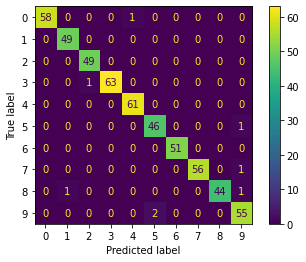

In [ ]:
clf = svm.SVC(kernel='rbf') 
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
Accuracy_SVM=  metrics.accuracy_score(y_test, y_pred)
Precision_SVM=  metrics.precision_score(y_test, y_pred, average='macro')
Recall_SVM=  metrics.recall_score(y_test, y_pred, average='macro')
F1_SVM= metrics.f1_score(y_test, y_pred,average='macro')
print("Accuracy_SVM: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_SVM:",  metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall_SVM: ",  metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_SVM:", metrics.f1_score(y_test, y_pred,average='macro'))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
RBF =['RBF', round(Accuracy_SVM, 2), round(Precision_SVM, 2), round(Recall_SVM, 2), round(F1_SVM, 2)]

In [ ]:
#using feature
clf = RandomForestClassifier()
clf.fit(mnist['data'], mnist['target'])

RandomForestClassifier()

In [ ]:

feature_sr = pd.Series(clf.feature_importances_,index=mnist.feature_names).sort_values(ascending=False)
feature_imp = feature_sr.head(30)
print(feature_imp)

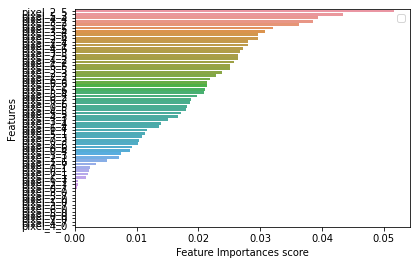

In [ ]:
sns.barplot(x=feature_sr, y=feature_sr.index)
plt.xlabel('Feature Importances score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [ ]:
x_new1 = mnist['data'][feature_imp.index]
x_train, x_test, y_train, y_test = train_test_split(x_new1, mnist['target'], test_size=0.3, random_state=1)

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 8 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 9 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 1 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 8 9 2 8 1 9 3 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 1 0 8 4 7 9 5 4 1 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

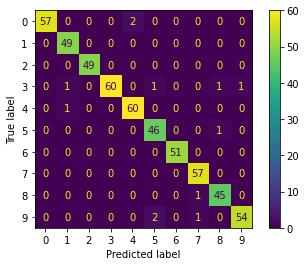

In [ ]:
y_pred = clf.predict(x_test)
print(y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
Accuracy_RdForest = metrics.accuracy_score(y_test, y_pred)
Precision_RdForest = metrics.precision_score(y_test, y_pred, average='macro')
Recall_RdForest = metrics.recall_score(y_test, y_pred, average='macro')
F1_RdForest = metrics.f1_score(y_test, y_pred,average='macro')
print('Accuracy_RdForest', Accuracy_RdForest)
print('Precision_RdForest', Precision_RdForest)
print('Recall_RdForest', Recall_RdForest)
print('F1_RdForest', F1_RdForest)
# print(metrics.classification_report(y_test, y_pred)
RF_feature =['RandomForest', round(Accuracy_RdForest, 2), round(Precision_RdForest, 2), round(Recall_RdForest, 2), round(F1_RdForest, 2)]

Accuracy_NaiveBayes:  0.8648148148148148
Precision_NaiveBayes: 0.8759131076210934
Recall_NaiveBayes:  0.8602461698139134
F1_NaiveBayes: 0.8624444274913138


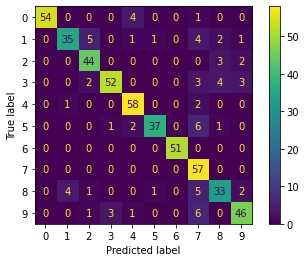

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
Accuracy_NaiveBayes=  metrics.accuracy_score(y_test, y_pred)
Precision_NaiveBayes=  metrics.precision_score(y_test, y_pred, average='macro')
Recall_NaiveBayes= metrics.recall_score(y_test, y_pred, average='macro')
F1_NaiveBayes= metrics.f1_score(y_test, y_pred,average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_NaiveBayes: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_NaiveBayes:",  metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall_NaiveBayes: ",  metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_NaiveBayes:", metrics.f1_score(y_test, y_pred,average='macro'))
# print(metrics.classification_report(y_test, y_pred))
NB_feature =['NeiveBayes', round(Accuracy_NaiveBayes, 2), round(Precision_NaiveBayes, 2), round(Recall_NaiveBayes, 2), round(F1_NaiveBayes, 2)]

Accuracy_SVM:  0.9888888888888889
Precision_SVM: 0.988987520246668
Recall_SVM:  0.9883208271545136
F1_SVM: 0.9885738369089377


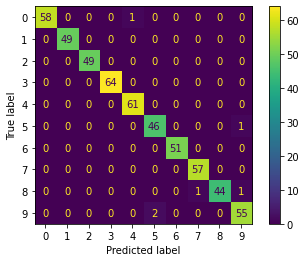

In [ ]:
clf = svm.SVC(kernel='rbf') 
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
Accuracy_SVM=  metrics.accuracy_score(y_test, y_pred)
Precision_SVM=  metrics.precision_score(y_test, y_pred, average='macro')
Recall_SVM=  metrics.recall_score(y_test, y_pred, average='macro')
F1_SVM= metrics.f1_score(y_test, y_pred,average='macro')
print("Accuracy_SVM: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_SVM:",  metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall_SVM: ",  metrics.recall_score(y_test, y_pred, average='macro'))
print("F1_SVM:", metrics.f1_score(y_test, y_pred,average='macro'))
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
RBF_feature =['RBF', round(Accuracy_SVM, 2), round(Precision_SVM, 2), round(Recall_SVM, 2), round(F1_SVM, 2)]

In [ ]:
print(RF) 
print(NB)
print(RBF)
print(RF_feature)
print(NB_feature)
print(RBF_feature)

['RandomForest', 0.98, 0.98, 0.98, 0.98]
['NeiveBayes', 0.83, 0.86, 0.83, 0.83]
['RBF', 0.99, 0.99, 0.99, 0.98]
['RandomForest', 0.98, 0.98, 0.98, 0.98]
['NeiveBayes', 0.86, 0.88, 0.86, 0.86]
['RBF', 0.99, 0.99, 0.99, 0.99]


In [ ]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])

t.add_row(RF)
t.add_row(NB)
t.add_row(RBF)
t.add_row(RF_feature)
t.add_row(NB_feature)
t.add_row(RBF_feature)
print(t)

+----------------+----------+-----------+--------+------+
| Classification | Accuracy | Precision | Recall |  F1  |
+----------------+----------+-----------+--------+------+
|  RandomForest  |   0.98   |    0.98   |  0.98  | 0.98 |
|   NeiveBayes   |   0.83   |    0.86   |  0.83  | 0.83 |
|      RBF       |   0.99   |    0.99   |  0.99  | 0.98 |
|  RandomForest  |   0.98   |    0.98   |  0.98  | 0.98 |
|   NeiveBayes   |   0.86   |    0.88   |  0.86  | 0.86 |
|      RBF       |   0.99   |    0.99   |  0.99  | 0.99 |
+----------------+----------+-----------+--------+------+


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [14]:
data = pd.read_csv('bank.csv')

#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [ ]:

#code
sc = StandardScaler()
data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = sc.fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [ ]:
#code
encoder = OneHotEncoder()
en_data = encoder.fit_transform(data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
en_df = pd.DataFrame(en_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data = pd.concat([data, en_df], axis=1)
data.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data['deposit'] = data['deposit'].map({'yes':1, 'no' : 0})
x_train, x_test, y_train, y_test = train_test_split(data.drop(['deposit'], axis=1), data['deposit'], test_size=0.3, random_state=1)
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[0 0 0 ... 0 1 0]
Accuracy_RdForest 0.8435353836966258
Precision_RdForest 0.81195079086116
Recall_RdForest 0.8722466960352423
F1_RdForest 0.8410194174757282


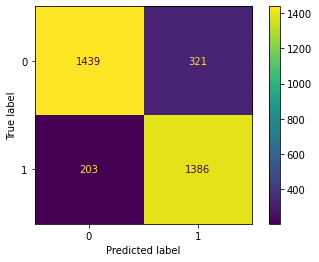

In [ ]:

y_pred = clf.predict(x_test)
print(y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
Accuracy_RdForest = metrics.accuracy_score(y_test, y_pred)
Precision_RdForest = metrics.precision_score(y_test, y_pred)
Recall_RdForest = metrics.recall_score(y_test, y_pred)
F1_RdForest = metrics.f1_score(y_test, y_pred)
print('Accuracy_RdForest', Accuracy_RdForest)
print('Precision_RdForest', Precision_RdForest)
print('Recall_RdForest', Recall_RdForest)
print('F1_RdForest', F1_RdForest)
# print(metrics.classification_report(y_test, y_pred)
RF =['RandomForest', round(Accuracy_RdForest, 2), round(Precision_RdForest, 2), round(Recall_RdForest, 2), round(F1_RdForest, 2)]

Accuracy_NaiveBayes:  0.7360406091370558
Precision_NaiveBayes: 0.827906976744186
Recall_NaiveBayes:  0.5601006922592826
F1_NaiveBayes: 0.6681681681681682


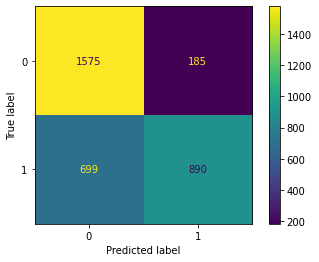

In [ ]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_NaiveBayes=  metrics.accuracy_score(y_test, y_pred)
Precision_NaiveBayes=  metrics.precision_score(y_test, y_pred)
Recall_NaiveBayes= metrics.recall_score(y_test, y_pred)
F1_NaiveBayes= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_NaiveBayes: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_NaiveBayes:",  metrics.precision_score(y_test, y_pred))
print("Recall_NaiveBayes: ",  metrics.recall_score(y_test, y_pred))
print("F1_NaiveBayes:", metrics.f1_score(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))
NB =['NeiveBayes', round(Accuracy_NaiveBayes, 2), round(Precision_NaiveBayes, 2), round(Recall_NaiveBayes, 2), round(F1_NaiveBayes, 2)]

Accuracy_Tree:  0.7715736040609137
Precision_Tree: 0.7620865139949109
Recall_Tree:  0.7539332913782253
F1_Tree: 0.7579879784878203


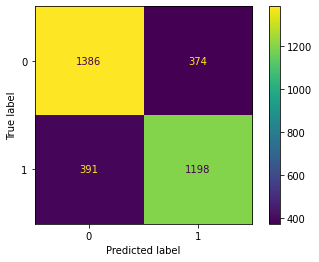

In [ ]:
#tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_Tree=  metrics.accuracy_score(y_test, y_pred)
Precision_Tree=  metrics.precision_score(y_test, y_pred)
Recall_Tree= metrics.recall_score(y_test, y_pred)
F1_Tree= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_Tree: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_Tree:",  metrics.precision_score(y_test, y_pred))
print("Recall_Tree: ",  metrics.recall_score(y_test, y_pred))
print("F1_Tree:", metrics.f1_score(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))
Tree =['Decision Tree', round(Accuracy_Tree, 2), round(Precision_Tree, 2), round(Recall_Tree, 2), round(F1_Tree, 2)]

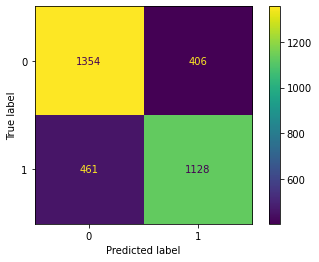

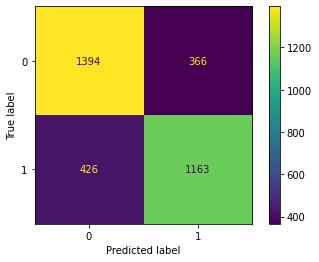

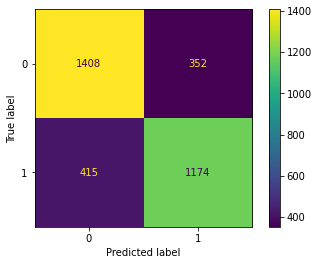

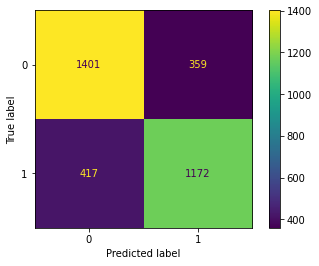

In [ ]:
k_range = range(1, 8, 2)
accs =[ ]
precision= [ ]
recalls = []
f1measure = [ ]
for i in k_range:
  kNM = KNeighborsClassifier(n_neighbors=i);
  kNM.fit(x_train, y_train)
  y_pred = kNM.predict(x_test)
  accs.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recalls.append(metrics.recall_score(y_test, y_pred))
  f1measure.append(metrics.f1_score(y_test, y_pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  

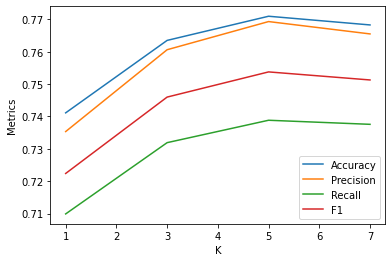

In [ ]:
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1measure, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
KNN=['KNN', accs[2], precision[2], recalls[2], f1measure[2]]
KNN

['KNN',
 0.7709764108689161,
 0.7693315858453473,
 0.7388294524858402,
 0.7537720706260034]

#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [ ]:
#code
clf = RandomForestClassifier()
x = data.drop(['deposit'], axis=1)
clf.fit(x, data['deposit'])

RandomForestClassifier()

In [ ]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp.head(20)

duration            0.328618
balance             0.077911
age                 0.071954
day                 0.064117
campaign            0.033771
poutcome_success    0.033529
pdays               0.032400
contact_unknown     0.022567
previous            0.021529
housing_no          0.016611
housing_yes         0.016101
contact_cellular    0.015174
month_apr           0.013311
month_mar           0.012763
poutcome_unknown    0.011822
month_may           0.011765
month_aug           0.011320
month_oct           0.011045
month_jun           0.010015
marital_married     0.009796
dtype: float64

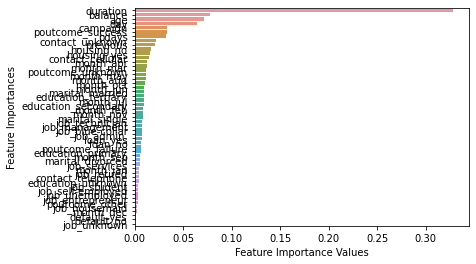

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Values')
plt.ylabel('Feature Importances')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data[feature_imp.index[:21].values], data['deposit'], test_size=0.3, random_state=1)

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[0 0 0 ... 0 1 0]
Accuracy_RdForest 0.8450283666766198
Precision_RdForest 0.813231850117096
Recall_RdForest 0.8741346758967904
F1_RdForest 0.8425841674249317


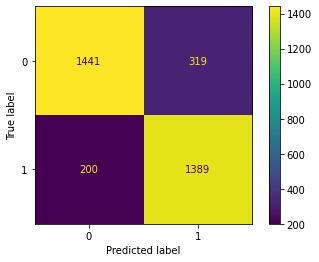

In [ ]:

y_pred = clf.predict(x_test)
print(y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
Accuracy_RdForest = metrics.accuracy_score(y_test, y_pred)
Precision_RdForest = metrics.precision_score(y_test, y_pred)
Recall_RdForest = metrics.recall_score(y_test, y_pred)
F1_RdForest = metrics.f1_score(y_test, y_pred)
print('Accuracy_RdForest', Accuracy_RdForest)
print('Precision_RdForest', Precision_RdForest)
print('Recall_RdForest', Recall_RdForest)
print('F1_RdForest', F1_RdForest)
# print(metrics.classification_report(y_test, y_pred)
RF_Feature =['RandomForestFeature', round(Accuracy_RdForest, 2), round(Precision_RdForest, 2), round(Recall_RdForest, 2), round(F1_RdForest, 2)]

Accuracy_NaiveBayes:  0.7372349955210511
Precision_NaiveBayes: 0.8297674418604651
Recall_NaiveBayes:  0.5613593455003146
F1_NaiveBayes: 0.6696696696696697


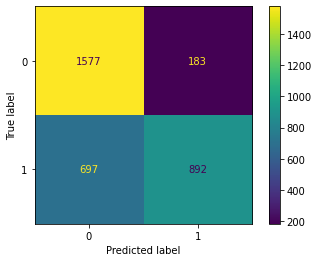

In [ ]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_NaiveBayes=  metrics.accuracy_score(y_test, y_pred)
Precision_NaiveBayes=  metrics.precision_score(y_test, y_pred)
Recall_NaiveBayes= metrics.recall_score(y_test, y_pred)
F1_NaiveBayes= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_NaiveBayes: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_NaiveBayes:",  metrics.precision_score(y_test, y_pred))
print("Recall_NaiveBayes: ",  metrics.recall_score(y_test, y_pred))
print("F1_NaiveBayes:", metrics.f1_score(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))
NB_feature =['NeiveBayesFeature', round(Accuracy_NaiveBayes, 2), round(Precision_NaiveBayes, 2), round(Recall_NaiveBayes, 2), round(F1_NaiveBayes, 2)]

Accuracy_Tree:  0.777246939384891
Precision_Tree: 0.7642633228840126
Recall_Tree:  0.7671491504090623
F1_Tree: 0.7657035175879396


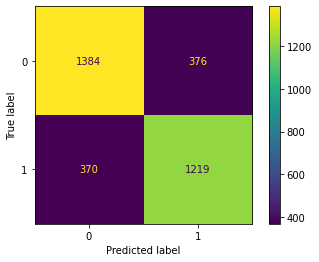

In [ ]:
#tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Accuracy_Tree=  metrics.accuracy_score(y_test, y_pred)
Precision_Tree=  metrics.precision_score(y_test, y_pred)
Recall_Tree= metrics.recall_score(y_test, y_pred)
F1_Tree= metrics.f1_score(y_test, y_pred)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))
print("Accuracy_Tree: ",  metrics.accuracy_score(y_test, y_pred))
print("Precision_Tree:",  metrics.precision_score(y_test, y_pred))
print("Recall_Tree: ",  metrics.recall_score(y_test, y_pred))
print("F1_Tree:", metrics.f1_score(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))
Tree_Feature =['Decision Tree Feature', round(Accuracy_Tree, 2), round(Precision_Tree, 2), round(Recall_Tree, 2), round(F1_Tree, 2)]

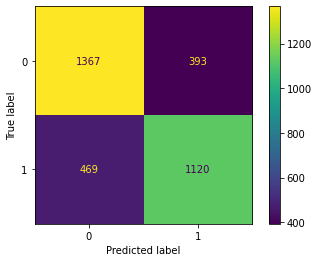

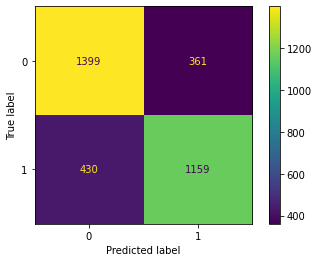

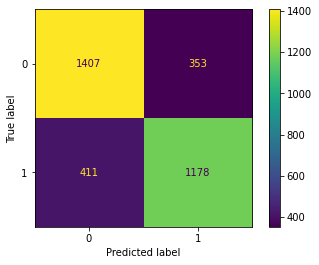

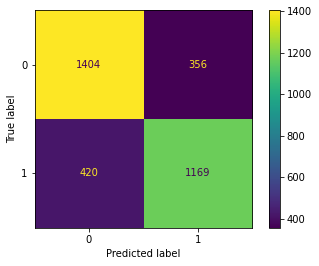

In [ ]:
k_range = range(1, 8, 2)
accs =[ ]
precision= [ ]
recalls = []
f1measure = [ ]
for i in k_range:
  kNM = KNeighborsClassifier(n_neighbors=i);
  kNM.fit(x_train, y_train)
  y_pred = kNM.predict(x_test)
  accs.append(metrics.accuracy_score(y_test, y_pred))
  precision.append(metrics.precision_score(y_test, y_pred))
  recalls.append(metrics.recall_score(y_test, y_pred))
  f1measure.append(metrics.f1_score(y_test, y_pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

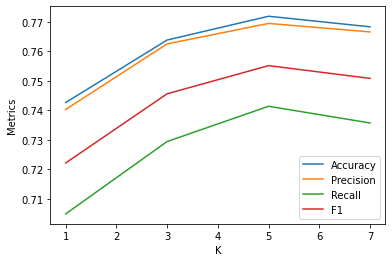

In [ ]:
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precision, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1measure, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [ ]:
KNN_feature=['KNN Feature', accs[3], precision[3], recalls[3], f1measure[3]]
KNN_feature

['KNN Feature',
 0.7682890415049268,
 0.7665573770491804,
 0.73568281938326,
 0.7508028259473347]

In [ ]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(RF)
t.add_row(NB)
t.add_row(Tree)
t.add_row(KNN)
t.add_row(RF_Feature)
t.add_row(NB_feature)
t.add_row(Tree_Feature)
t.add_row(KNN_feature)
print(t)

+-----------------------+--------------------+--------------------+--------------------+--------------------+
|     Classification    |      Accuracy      |     Precision      |       Recall       |         F1         |
+-----------------------+--------------------+--------------------+--------------------+--------------------+
|      RandomForest     |        0.84        |        0.81        |        0.87        |        0.84        |
|       NeiveBayes      |        0.74        |        0.83        |        0.56        |        0.67        |
|     Decision Tree     |        0.77        |        0.76        |        0.75        |        0.76        |
|          KNN          | 0.7709764108689161 | 0.7693315858453473 | 0.7388294524858402 | 0.7537720706260034 |
|  RandomForestFeature  |        0.85        |        0.81        |        0.87        |        0.84        |
|   NeiveBayesFeature   |        0.74        |        0.83        |        0.56        |        0.67        |
| Decision

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [15]:
dataset = pd.read_csv('creditcard.csv')
# data = load_data.head(int(load_data[['Class']].count()/3))
x = dataset.drop('Class', axis=1)
y = dataset[['Class']]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy: 0.9984199992977775
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


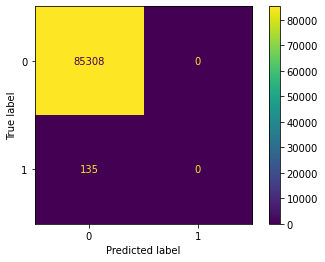

In [17]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
RBF = ["RBF", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

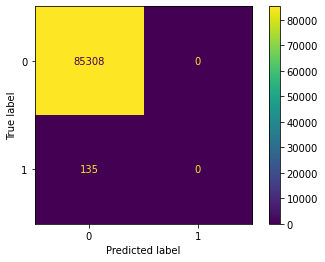

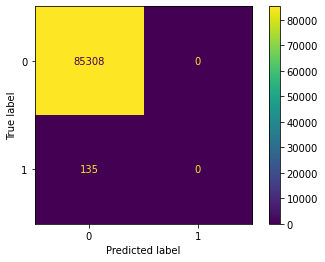

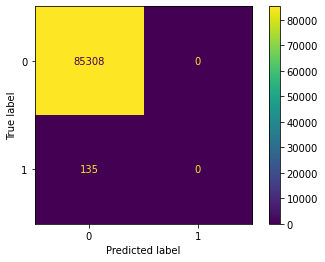

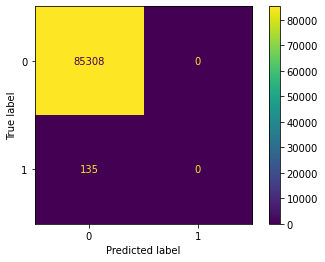

In [18]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, pred))
  prec.append(metrics.precision_score(y_test, pred))
  recall.append(metrics.recall_score(y_test, pred))
  f1.append(metrics.f1_score(y_test, pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

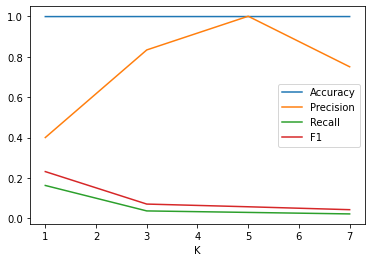

In [19]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [20]:
knn=['KNN', round(acc[2],2), round(prec[2],2), round(recall[2],2), round(f1[2],2)]
knn

['KNN', 1.0, 1.0, 0.03, 0.06]

[0 0 0 ... 0 0 0]
Accuracy: 0.9991924440855307
Precision: 0.746268656716418
Recall: 0.7407407407407407
F1: 0.7434944237918215


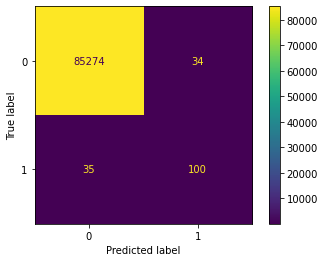

In [51]:
#tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
Tree = ["Decision Tree", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 ... 0 0 0]
Accuracy: 0.9991456292499094
Precision: 0.7279411764705882
Recall: 0.7333333333333333
F1: 0.7306273062730627


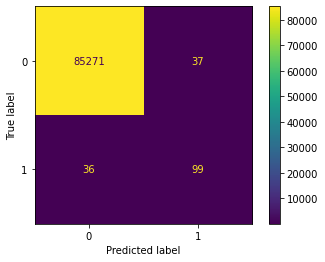

In [22]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
logic = ["Logistic Regression", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

<ipython-input-23-9d33aff9eacf>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


[0 0 0 ... 0 0 0]
Accuracy:  0.9995084442259752
Precision:  0.911504424778761
Recall:  0.762962962962963
F1:  0.8306451612903226


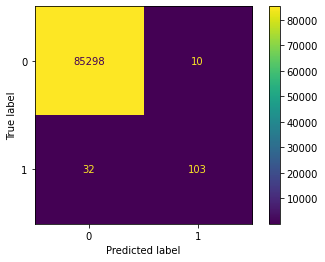

In [23]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF=['RF', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy:  0.9933288859239493
Precision:  0.5705514051998223
Recall:  0.8154648775938691
F1:  0.6142279132386735


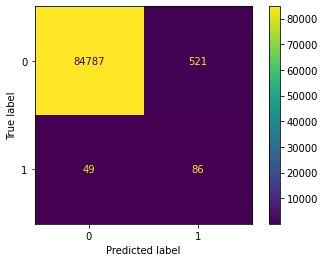

In [24]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict, average='macro')
rs = metrics.recall_score(y_test, y_predict, average='macro')
fs = metrics.f1_score(y_test, y_predict, average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB=['Naive Bayes', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [25]:
clf = RandomForestClassifier()
clf.fit(x, y)

<ipython-input-25-1f95e2692a10>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x, y)


RandomForestClassifier()

In [26]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp

V17       0.167527
V12       0.156210
V14       0.113609
V11       0.079983
V10       0.062605
V16       0.060371
V9        0.040483
V18       0.028198
V7        0.024673
V4        0.022808
V26       0.019373
V21       0.019054
V3        0.014547
V27       0.013381
V1        0.013340
V6        0.013021
V15       0.012328
Time      0.012251
V8        0.012028
V2        0.011878
V20       0.011466
V19       0.011406
V5        0.011038
V22       0.010814
V28       0.010614
V24       0.010305
V13       0.010225
Amount    0.010077
V25       0.008989
V23       0.007398
dtype: float64

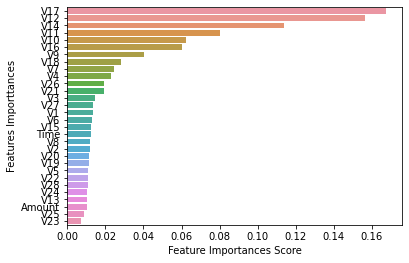

In [27]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importances Score')
plt.ylabel('Features Importtances')
plt.show()

In [28]:
x_new = x[feature_imp[feature_imp > 0.02].index.values]
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=1)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy: 0.9993914071369217
Precision: 0.9368421052631579
Recall: 0.6592592592592592
F1: 0.7739130434782608


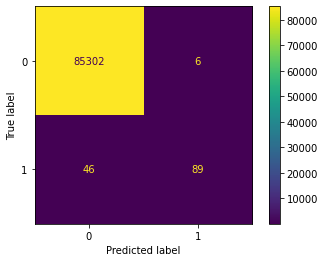

In [29]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
RBF_feature = ["RBF Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

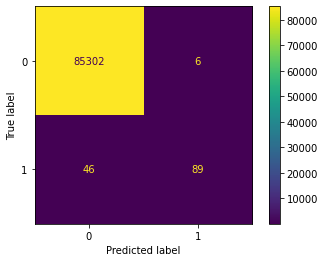

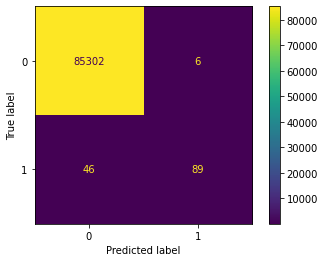

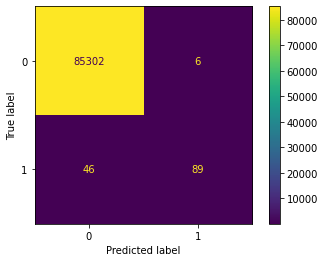

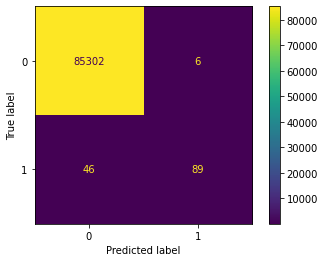

In [30]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(metrics.accuracy_score(y_test, pred))
  prec.append(metrics.precision_score(y_test, pred))
  recall.append( metrics.recall_score(y_test, pred))
  f1.append(metrics.f1_score(y_test, pred))
  metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

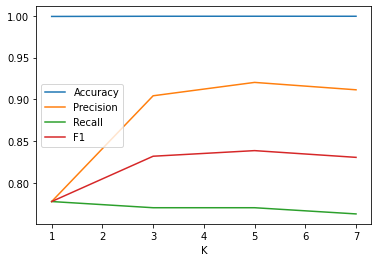

In [31]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [32]:
KNN_feature=['KNN Feature', round(acc[2],2), round(prec[2],2), round(recall[2],2), round(f1[2],2)]
KNN_feature

['KNN Feature', 1.0, 0.92, 0.77, 0.84]

In [43]:
#tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9991924440855307
Precision: 0.746268656716418
Recall: 0.7407407407407407
F1: 0.7434944237918215


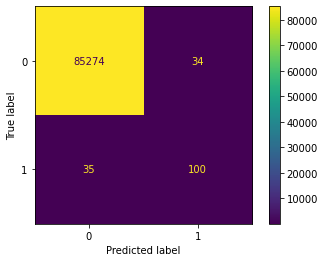

In [44]:

y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
tree_feature = ["Decision Tree Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [45]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9991924440855307
Precision: 0.746268656716418
Recall: 0.7407407407407407
F1: 0.7434944237918215


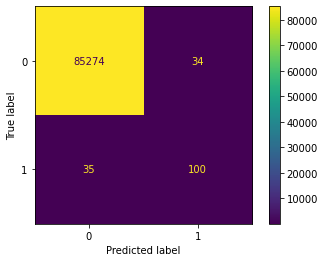

In [46]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
logic_feature = ["Logistic Regression Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

<ipython-input-47-609979761f89>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


[0 0 0 ... 0 0 0]
Accuracy:  0.9994850368081645
Precision:  0.8888888888888888
Recall:  0.7703703703703704
F1:  0.8253968253968255


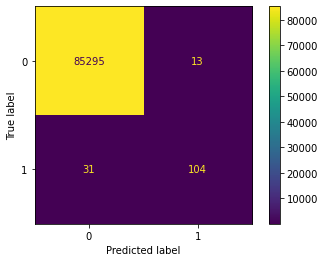

In [47]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict)
rs = metrics.recall_score(y_test, y_predict)
fs = metrics.f1_score(y_test, y_predict)
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF_feature=['RF Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]
Accuracy:  0.9909998478517842
Precision:  0.5642550369533047
Recall:  0.9030467378336277
F1:  0.6089603221384361


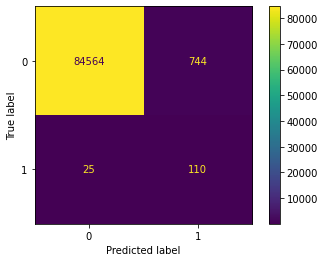

In [48]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)
ac = metrics.accuracy_score(y_test, y_predict)
ps = metrics.precision_score(y_test, y_predict, average='macro')
rs = metrics.recall_score(y_test, y_predict, average='macro')
fs = metrics.f1_score(y_test, y_predict, average='macro')
print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB_feature=['Naive Bayes Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [52]:
from prettytable import PrettyTable
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(logic)
t.add_row(knn)
t.add_row(Tree)
t.add_row(RBF)
t.add_row(RF)
t.add_row(NB)
t.add_row(logic_feature)
t.add_row(KNN_feature)
t.add_row(tree_feature)
t.add_row(RBF_feature)
t.add_row(RF_feature)
t.add_row(NB_feature)
print(t)

+-----------------------------+----------+-----------+--------+------+
|        Classification       | Accuracy | Precision | Recall |  F1  |
+-----------------------------+----------+-----------+--------+------+
|     Logistic Regression     |   1.0    |    0.73   |  0.73  | 0.73 |
|             KNN             |   1.0    |    1.0    |  0.03  | 0.06 |
|        Decision Tree        |   1.0    |    0.75   |  0.74  | 0.74 |
|             RBF             |   1.0    |    0.0    |  0.0   | 0.0  |
|              RF             |   1.0    |    0.91   |  0.76  | 0.83 |
|         Naive Bayes         |   0.99   |    0.57   |  0.82  | 0.61 |
| Logistic Regression Feature |   1.0    |    0.75   |  0.74  | 0.74 |
|         KNN Feature         |   1.0    |    0.92   |  0.77  | 0.84 |
|    Decision Tree Feature    |   1.0    |    0.75   |  0.74  | 0.74 |
|         RBF Feature         |   1.0    |    0.94   |  0.66  | 0.77 |
|          RF Feature         |   1.0    |    0.89   |  0.77  | 0.83 |
|     

#Finally,
Save a copy in your Github. Remember renaming the notebook.